In [44]:
import json
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
test = pd.DataFrame(columns=["func","target"])

In [22]:
i=0
with open("data_defect_test.jsonl","r") as f:
    for line in f:
        line = json.loads(line)
        func = line["func"]
        target = line["target"]
        test.at[i,"func"] = func
        test.at[i,"target"] = target
        i+=1

        

    

In [24]:
test.to_csv("data_defect_test.csv")

In [28]:
df = pd.read_csv("predictions.csv")
df

,Unnamed: 0,Generated Text,Actual Text
0,0,True,0
1,1,False,1
2,2,False,1
3,3,True,0
4,4,True,0
...,...,...,...
2727,2727,False,0
2728,2728,False,0
2729,2729,True,0
2730,2730,False,0


In [29]:
df["Generated Text"][0]

True

In [37]:
pred = []
for i in range(df.shape[0]):
    if df["Generated Text"][i]:
        pred.append(1)
    elif not df["Generated Text"][i]:
        pred.append(0)

In [38]:
accuracy_score(pred,df["Actual Text"])

0.6416544655929722

In [41]:
accuracy = accuracy_score(pred,df["Actual Text"])
accuracy

0.6416544655929722

In [42]:
f1score = f1_score(pred,df["Actual Text"])
f1score

0.610115491835922

Text(0.5, 1.0, 'Confusion Matrix for CodeBERT')

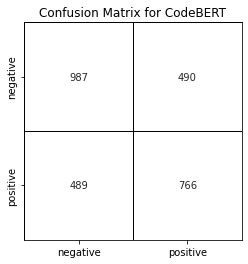

In [45]:
cm = confusion_matrix(df["Actual Text"],pred)
cm = pd.DataFrame(cm, columns=['negative','positive'],index = ['negative','positive']) 
sns.heatmap(cm, fmt='d', annot=True, square=True,
            cmap='gray_r', vmin=0, vmax=0,  # set all to white
            linewidths=0.5, linecolor='k',  # draw black grid lines
            cbar=False)                     # disable colorbar

# re-enable outer spines
sns.despine(left=False, right=False, top=False, bottom=False)
plt.title('Confusion Matrix for CodeBERT')